### Problem 1

1.
2011년부터 2020년까지의 평균 영화 러닝타임은 각각 103, 101, 99, 100, 100, 95, 95, 96, 93, 90입니다.

연도와 러닝타임을 각각 list로 만들고, key는 year, value는 duration으로 구성되어 있는 dict를 만드세요.


In [1]:
years = [i for i in range(2011, 2021)]
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

movie_dict = {'years': years, 'durations': durations}

print(movie_dict)

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}


2.
movie_dict를 pandas 라이브러리를 활용해 DataFrame으로 변환하세요.

In [2]:
import pandas as pd

durations_df = pd.DataFrame(movie_dict)

print(durations_df)

   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


3.
durations_df를 matploblib을 활용해 years와 durations의 관계를 나타내는 Line plot을 그리세요.

제목은 "Average Movie Durations 2011-2020"으로 설정하세요.

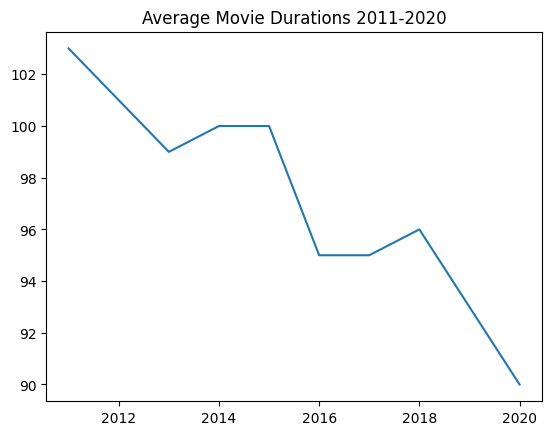

In [3]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
fig = plt.figure()

# Draw a line plot of years and durations
plt.plot(years, durations)

# Create a title
plt.title("Average Movie Durations 2011-2020")

# Show the plot
plt.show()

### Problem 2

1.
pandas 라이브러리를 활용해 <code>"datasets/netflix_data.csv"</code>을 불러 netflix_df에 DataFrame 형식으로 지정하고, 다섯번째 열까지 출력합니다.

In [4]:
# Import pandas
import pandas as pd

# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("datasets/netflix_data.csv") 

# Print the first five rows of the DataFrame
netflix_df[:5]

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


2.
netflix_df에서 'type' 중에 'Movie'가 아닌 데이터가 있음을 확인할 수 있습니다. 위 DataFrame에서 'type'이 'Movie'인 데이터만 필터링해 분석하려고 합니다. 

또한 다양한 정보가 모두 필요하지 않으니, 'title', 'genre', release_year', 'duration' 행만 포함된 새로운 DataFrame을 netfilx_movies_subset에 지정해보세요.

In [5]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df['type'] == 'Movie']

# Select some columns to the netflix_movies_subset
netflix_movies_subset = netflix_df_movies_only[['title', 'genre', 'release_year', 'duration']]
netflix_movies_subset[:10]

,title,genre,release_year,duration
1,7:19,Dramas,2016,93
2,23:59,Horror Movies,2011,78
3,9,Action,2009,80
4,21,Dramas,2008,123
6,122,Horror Movies,2019,95
7,187,Dramas,1997,119
8,706,Horror Movies,2019,118
9,1920,Horror Movies,2008,143
10,1922,Dramas,2017,103
13,"2,215",Documentaries,2018,89


3.
netfilx_movies_subset에는 다양한 'genre'를 가지고 있습니다. 위 DataFrame에서 주요 장르별로 colors list를 만들어, 추후에 보다 직관적으로 그래프를 작성하고자 합니다.

"Comedies"는 "red", "Dramas"는 "yellow", "Action"은 "blue", "Horror Movies"는 "green", 나머지는 "black"으로 구성되어 있는 list를 만드려고 합니다.

우선 비어있는 colors list를 생성하고, netfilx_movies_subset의 각각의 요소들을 순서대로 'genre'에 조건에 따라 색깔을 지정해줍니다.

In [6]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in netflix_movies_subset.iterrows():
    if row['genre'] == "Comedies":
        colors.append("red")
    elif row['genre'] == "Dramas":
        colors.append("yellow")
    elif row['genre'] == "Action":
        colors.append("blue")
    elif row['genre'] == "Horror Movies":
        colors.append("green")
    else:
        colors.append("black")
# Inspect the first 10 values in your list      
colors[:10]

['yellow',
 'green',
 'blue',
 'yellow',
 'green',
 'yellow',
 'green',
 'green',
 'yellow',
 'black']

4.
netflix_movies_subset를 matploblib을 활용해 years와 durations의 관계를 나타내는 Scatter plot을 그리세요. 색깔은 3번에서 지정한 colors list를 활용하고, dot size는 10으로 지정하세요.

제목은 "Movie Durations by Release Year"로, xlabel은 "Release year"로, ylabel은 "Duration (min)"로 설정하세요.

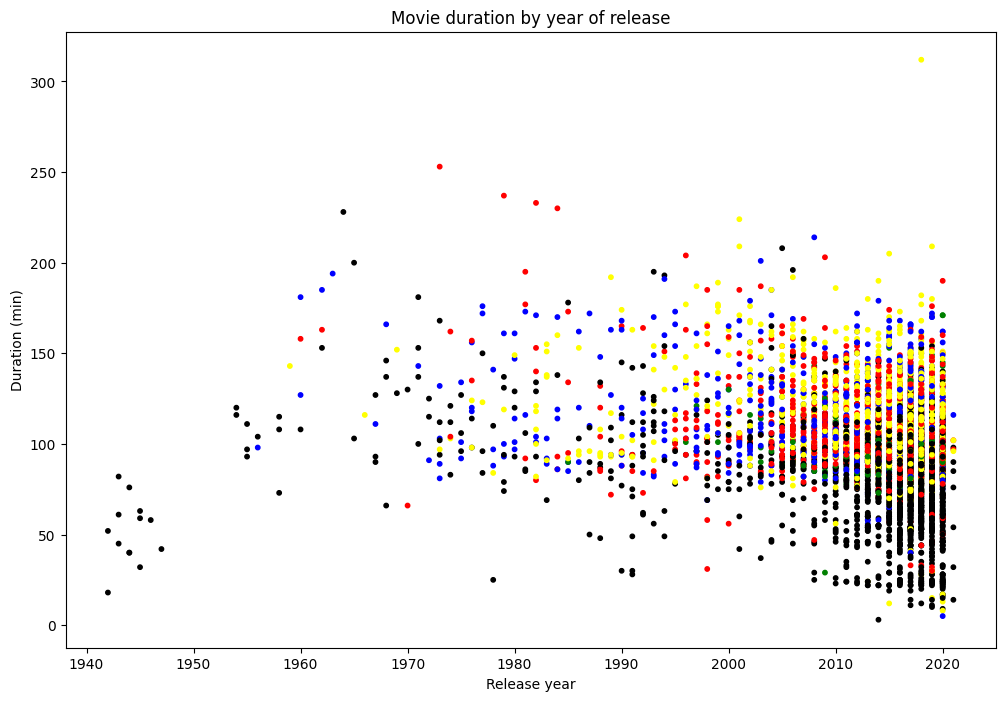

In [7]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of years and durations
plt.scatter(netflix_movies_subset["release_year"], netflix_movies_subset["duration"], c=colors, s=10)

# Create a title, labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()